In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
DATADIR = "C:/Users/Rawan/Desktop/Classification-Flutter-TFlite-master/Currency/"
CATEGORIE = ["5", "10", "20", "50", "100", "200"]
CLASSES = {
    '1': 0,
    '5': 1,
    '10': 2,
    '20': 3,
    '50': 4,
    '100': 5,
    '200': 6
}

In [3]:
dataset = []

for cat in os.listdir(DATADIR):
    path = os.path.join(DATADIR, cat)
    for img_path in os.listdir(path):
        img = cv2.imread(os.path.join(path, img_path))
        img = cv2.resize(img, (128, 128))
        img = img / 255.0
        
        lab = CLASSES[cat]
        dataset.append([img, lab])

random.seed(42)
random.shuffle(dataset)

data = []
labels = []

for d, l in dataset:
    data.append(d)
    labels.append(l)

data = np.array(data)
labels = np.array(labels)
    
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

Data shape: (901, 128, 128, 3)
Labels shape: (901,)


In [4]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(720, 128, 128, 3)
(720,)
(181, 128, 128, 3)
(181,)


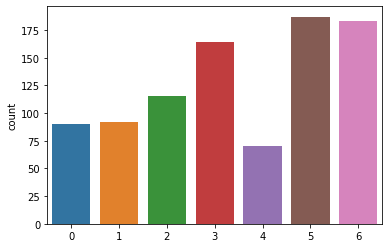

In [5]:
import seaborn as sns

sns.countplot(x=labels);

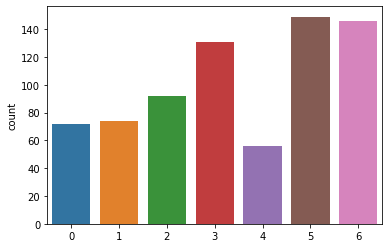

In [6]:
sns.countplot(x=trainY);

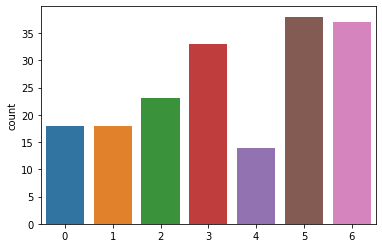

In [7]:
sns.countplot(x=testY);

In [8]:
def create_model(input_shape):

    model= Sequential()

    model.add(Conv2D(64,(3,3), padding='same', input_shape = input_shape))
    #model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(128, (3,3), padding='same'))
    #model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(256, (3,3), padding='same'))
    #model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Dropout(0.5))

    model.add(Dense(len(CLASSES)))
    model.add(Activation('softmax'))
    
    return model

def create_mobilenet(input_shape):
    base_model = tf.keras.applications.MobileNetV2(include_top=False, input_shape=input_shape)
    base_model.trainable = False
    
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(len(CLASSES), activation='softmax')
    ])
    
    return model

#model = create_model(data.shape[1:])
model = create_mobilenet(data.shape[1:])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1, 
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, 
                         horizontal_flip=True, fill_mode="nearest")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 8967      
Total params: 2,266,951
Trainable params: 8,967
Non-trainable params: 2,257,984
_________________________________________________________________


In [9]:
EPOCHS = 80

H = model.fit(aug.flow(trainX, trainY, batch_size=32), 
             validation_data=(testX, testY), 
             steps_per_epoch=len(trainX) // 32,
             epochs=EPOCHS, verbose=1)

#H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, verbose=1)

Epoch 1/80
22/22 [==============================] - 37s 1s/step - loss: 2.2798 - accuracy: 0.1681 - val_loss: 1.6788 - val_accuracy: 0.3702
Epoch 2/80
22/22 [==============================] - 16s 709ms/step - loss: 1.5835 - accuracy: 0.3553 - val_loss: 1.4306 - val_accuracy: 0.4475
Epoch 3/80
22/22 [==============================] - 15s 686ms/step - loss: 1.3194 - accuracy: 0.5246 - val_loss: 1.3230 - val_accuracy: 0.5083
Epoch 4/80
22/22 [==============================] - 15s 677ms/step - loss: 1.3141 - accuracy: 0.5482 - val_loss: 1.2447 - val_accuracy: 0.5525
Epoch 5/80
22/22 [==============================] - 14s 617ms/step - loss: 1.1549 - accuracy: 0.6204 - val_loss: 1.1695 - val_accuracy: 0.5967
Epoch 6/80
22/22 [==============================] - 15s 674ms/step - loss: 1.1016 - accuracy: 0.6061 - val_loss: 1.1474 - val_accuracy: 0.6077
Epoch 7/80
22/22 [==============================] - 15s 664ms/step - loss: 0.9735 - accuracy: 0.6323 - val_loss: 1.1236 - val_accuracy: 0.6354
Ep

Epoch 58/80
22/22 [==============================] - 13s 617ms/step - loss: 0.2882 - accuracy: 0.9474 - val_loss: 0.7890 - val_accuracy: 0.7403
Epoch 59/80
22/22 [==============================] - 13s 575ms/step - loss: 0.3108 - accuracy: 0.9121 - val_loss: 0.8332 - val_accuracy: 0.7680
Epoch 60/80
22/22 [==============================] - 13s 580ms/step - loss: 0.3487 - accuracy: 0.8954 - val_loss: 0.8376 - val_accuracy: 0.7403
Epoch 61/80
22/22 [==============================] - 13s 583ms/step - loss: 0.3153 - accuracy: 0.9048 - val_loss: 0.8264 - val_accuracy: 0.7459
Epoch 62/80
22/22 [==============================] - 13s 587ms/step - loss: 0.3024 - accuracy: 0.9108 - val_loss: 0.8625 - val_accuracy: 0.7182
Epoch 63/80
22/22 [==============================] - 13s 578ms/step - loss: 0.3002 - accuracy: 0.9168 - val_loss: 0.8831 - val_accuracy: 0.7238
Epoch 64/80
22/22 [==============================] - 13s 581ms/step - loss: 0.3664 - accuracy: 0.8844 - val_loss: 0.8473 - val_accuracy:

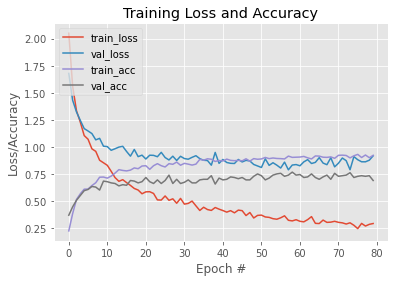

In [10]:
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left");

In [11]:
from sklearn.metrics import classification_report

preds = model.predict(testX)
predIdxs = np.argmax(preds, axis=1)

print(classification_report(testY, predIdxs, target_names=CLASSES.keys()))

              precision    recall  f1-score   support

           1       0.93      0.72      0.81        18
           5       0.44      0.78      0.56        18
          10       0.62      0.78      0.69        23
          20       0.79      0.33      0.47        33
          50       0.80      0.57      0.67        14
         100       0.64      0.79      0.71        38
         200       0.89      0.84      0.86        37

    accuracy                           0.69       181
   macro avg       0.73      0.69      0.68       181
weighted avg       0.73      0.69      0.69       181



In [12]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('C:/Users/Rawan/Desktop/Classification-Flutter-TFlite-master/assets/modelMobNet.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Rawan\AppData\Local\Temp\tmpxu7hktsb\assets
